In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [2]:
cust_df = pd.read_csv('./../data/train_santander.csv', encoding='latin-1')
print('dataset shape: ', cust_df.shape)
cust_df.head(3)

dataset shape:  (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


In [3]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


* null값은 존재하지 않음

In [4]:
cust_df.isnull().sum().sum()

0

In [5]:
print(cust_df['TARGET'].value_counts())
unsatisfied_cnt = cust_df[cust_df['TARGET'] == 1].TARGET.count()
total_cnt = cust_df.TARGET.count()
print('unsatisfied 비율은 {0:.2f}'.format((unsatisfied_cnt / total_cnt)))

0    73012
1     3008
Name: TARGET, dtype: int64
unsatisfied 비율은 0.04


In [6]:
cust_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [7]:
# var3 피쳐 값
cust_df['var3'].replace(-999999, 2, inplace=True)
cust_df.drop('ID', axis=1, inplace=True)

# 피처 세트와 레이블 세트 분리, 레이블 컬럼은 DataFrame의 맨 마지막에 위치해 컬럼 위치 -1로 분리
X_features = cust_df.iloc[:, :-1]
y_labels = cust_df.iloc[:, -1]
print('피처 데이터 shape:{0}'.format(X_features.shape))

피처 데이터 shape:(76020, 369)


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels,
                                                    test_size=0.2, random_state=0)
train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape, X_test.shape))

print(' 학습 세트 레이블 값 분포 비율')
print(y_train.value_counts() / train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts() / test_cnt)

학습 세트 Shape:(60816, 369), 테스트 세트 Shape:(15204, 369)
 학습 세트 레이블 값 분포 비율
0    0.960964
1    0.039036
Name: TARGET, dtype: float64

 테스트 세트 레이블 값 분포 비율
0    0.9583
1    0.0417
Name: TARGET, dtype: float64


### 모델 적용

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

np.random.seed(3)
tf.random.set_seed(3)

In [10]:
model = Sequential()
model.add(Dense(12, input_dim=369, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Metal device set to: Apple M1 Pro


2022-06-13 20:26:42.070882: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-06-13 20:26:42.071053: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [31]:
hist = model.fit(X_train, y_train, epochs=50, batch_size=10,
                 validation_data=(X_test, y_test), verbose=2)

Epoch 1/50


2022-06-13 19:34:35.894171: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-13 19:35:02.652408: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


6082/6082 - 31s - loss: 83061.5703 - accuracy: 0.9498 - val_loss: 90227.8359 - val_accuracy: 0.9577 - 31s/epoch - 5ms/step
Epoch 2/50
6082/6082 - 31s - loss: 47940.2461 - accuracy: 0.9605 - val_loss: 65070.3320 - val_accuracy: 0.9574 - 31s/epoch - 5ms/step
Epoch 3/50
6082/6082 - 31s - loss: 10763.4697 - accuracy: 0.9605 - val_loss: 53651.2148 - val_accuracy: 0.9582 - 31s/epoch - 5ms/step
Epoch 4/50
6082/6082 - 30s - loss: 2211.0386 - accuracy: 0.9603 - val_loss: 55427.5547 - val_accuracy: 0.9582 - 30s/epoch - 5ms/step
Epoch 5/50
6082/6082 - 30s - loss: 1246.8375 - accuracy: 0.9607 - val_loss: 51442.2930 - val_accuracy: 0.9569 - 30s/epoch - 5ms/step
Epoch 6/50
6082/6082 - 30s - loss: 349.9242 - accuracy: 0.9605 - val_loss: 48205.6680 - val_accuracy: 0.9581 - 30s/epoch - 5ms/step
Epoch 7/50
6082/6082 - 30s - loss: 555.9971 - accuracy: 0.9607 - val_loss: 44171.8711 - val_accuracy: 0.9582 - 30s/epoch - 5ms/step
Epoch 8/50
6082/6082 - 30s - loss: 395.8417 - accuracy: 0.9607 - val_loss: 4291

In [ ]:
model.save('model.h5')

In [10]:
from keras.models import load_model

model = load_model('model.h5')
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 12)                4440      
                                                                 
 dense_10 (Dense)            (None, 8)                 104       
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 4,553
Trainable params: 4,553
Non-trainable params: 0
_________________________________________________________________


In [33]:
y_pred = model.predict(X_features)

  86/2376 [>.............................] - ETA: 4s

2022-06-13 20:13:56.133752: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2376/2376 [==============================] - 4s 2ms/step


In [34]:
res = model.evaluate(X_features, y_labels, verbose=0)
print('정확률은 ', res[1] * 100)

정확률은  96.04182839393616


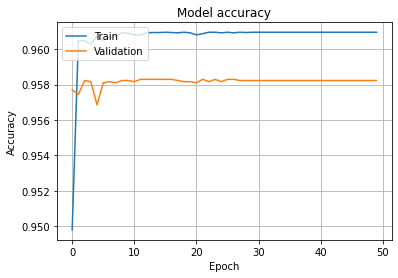

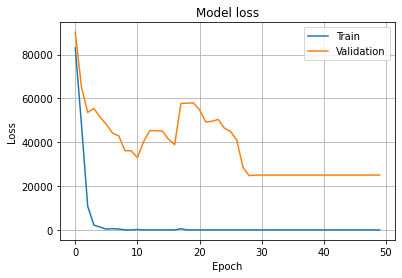

In [36]:
# 정확률 곡선
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid()
plt.show()

# 손실함수 곡선
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.grid()
plt.show()


### 정규화

In [12]:
from sklearn.preprocessing import StandardScaler    # MinMaxScaler
scaler = StandardScaler()
scaler.fit(X_features)
X_ss = scaler.transform(X_features)
X_ss

array([[-7.58350330e-02, -7.88248631e-01, -5.33881045e-02, ...,
        -1.88169080e-02, -1.98468529e-02, -4.27182680e-01],
       [-7.58350330e-02,  6.07525955e-02, -5.33881045e-02, ...,
        -1.88169080e-02, -1.98468529e-02, -3.72038298e-01],
       [-7.58350330e-02, -7.88248631e-01, -5.33881045e-02, ...,
        -1.88169080e-02, -1.98468529e-02, -2.73191237e-01],
       ...,
       [-7.58350330e-02, -7.88248631e-01, -5.33881045e-02, ...,
        -1.88169080e-02, -1.98468529e-02, -2.36542515e-01],
       [-7.58350330e-02, -6.33884772e-01, -5.33881045e-02, ...,
        -1.88169080e-02, -1.98468529e-02, -1.80428318e-01],
       [-7.58350330e-02,  9.86935752e-01, -5.33881045e-02, ...,
        -1.88169080e-02, -1.98468529e-02,  4.11519699e-04]])

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_ss, y_labels, test_size=0.2, random_state=0)

* 전처리 한 후 실행 + 규제화

In [14]:
from keras.regularizers import l2
model = Sequential()
model.add(Dense(8, input_dim=369, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(8, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
hist_standard = model.fit(X_train, y_train, batch_size=10, epochs=50, validation_data=(X_test, y_test), verbose=0)

2022-06-13 21:23:21.083261: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-13 21:23:48.933134: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
